In [1]:
import pymysql
import pandas as pd

In [2]:
db_name = 'hr'
db_host = 'localhost'
db_username = 'root'
db_password = 'kiranprm11mysql'

In [3]:
try:
    conn = pymysql.connect(host = db_host,
                            port = int(3307),
                            user = 'root',
                            passwd = db_password,
                            db = db_name)
except e:
    print(e)

### PLAYING WITH CODE AND WINDOW FUCTION

#### FIRST VALUE

employee who earns the most under each department  ?

In [6]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    FIRST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary) AS max_earner 
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn)

,employee_id,first_name,salary,department_name,max_earner
0,206,William,8300,Accounting,206
1,205,Shelley,12000,Accounting,206
2,200,Jennifer,4400,Administration,200
3,101,Neena,17000,Executive,101
4,102,Lex,17000,Executive,101
...,...,...,...,...,...
101,124,Kevin,5800,Shipping,132
102,123,Shanta,6500,Shipping,132
103,122,Payam,7900,Shipping,132
104,120,Matthew,8000,Shipping,132


- this is is showing the least expesive because i did not order by DESC 
- so order by is very important 

In [7]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    FIRST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC) AS max_earner 
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn)

,employee_id,first_name,salary,department_name,max_earner
0,205,Shelley,12000,Accounting,205
1,206,William,8300,Accounting,205
2,200,Jennifer,4400,Administration,200
3,100,Steven,25000,Executive,100
4,101,Neena,17000,Executive,100
...,...,...,...,...,...
101,135,Ki,2400,Shipping,121
102,127,James,2400,Shipping,121
103,136,Hazel,2200,Shipping,121
104,128,Steven,2200,Shipping,121


- here the first value what i does is it goes to the partition and takes the first value of whats provided inside the function and keeps it on new column. repeatsz the same for every partititon

#### LAST VALUE

employee who earns the least under each department ?

In [10]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    FIRST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC) AS max_earner,
    LAST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC) AS least_earner
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn).head(20)

,employee_id,first_name,salary,department_name,max_earner,least_earner
0,205,Shelley,12000,Accounting,205,205
1,206,William,8300,Accounting,205,206
2,200,Jennifer,4400,Administration,200,200
3,100,Steven,25000,Executive,100,100
4,101,Neena,17000,Executive,100,102
5,102,Lex,17000,Executive,100,102
6,108,Nancy,12000,Finance,108,108
7,109,Daniel,9000,Finance,108,109
8,110,John,8200,Finance,108,110
9,112,Jose Manuel,7800,Finance,108,112


-  we can see that the output is not the correct one because of something called frame clause. 
- what is a frame clause ??


- when we use window fuction they make windows and inside each partition there is a subset called frame 
- partition
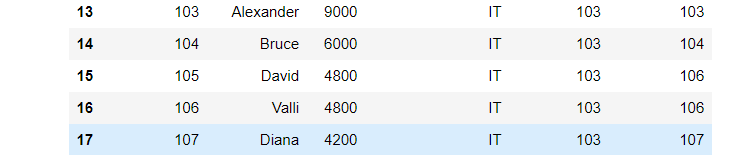 
- the FRAME CLAUSE by default is RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW ie why the values is not the least value
- how this works is inside each partition the execution is row wise ie for the 1st row is least value is (RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) == just row 1 
- so 2nd execution it takes 2 rows and fill the last value 
- instead of that what we needed was - take the whole partiton and take the least value inside that. 
- for that we need to use RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING instead of CURRENT ROW.

RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW is same as not mentioning anything = same mistake 

In [11]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    FIRST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC) AS max_earner,
    LAST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC
        RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS least_earner
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn).head(20)

,employee_id,first_name,salary,department_name,max_earner,least_earner
0,205,Shelley,12000,Accounting,205,205
1,206,William,8300,Accounting,205,206
2,200,Jennifer,4400,Administration,200,200
3,100,Steven,25000,Executive,100,100
4,101,Neena,17000,Executive,100,102
5,102,Lex,17000,Executive,100,102
6,108,Nancy,12000,Finance,108,108
7,109,Daniel,9000,Finance,108,109
8,110,John,8200,Finance,108,110
9,112,Jose Manuel,7800,Finance,108,112


RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING

In [12]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    FIRST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC) AS max_earner,
    LAST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC
        RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS least_earner
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn).head(20)

,employee_id,first_name,salary,department_name,max_earner,least_earner
0,205,Shelley,12000,Accounting,205,206
1,206,William,8300,Accounting,205,206
2,200,Jennifer,4400,Administration,200,200
3,100,Steven,25000,Executive,100,102
4,101,Neena,17000,Executive,100,102
5,102,Lex,17000,Executive,100,102
6,108,Nancy,12000,Finance,108,113
7,109,Daniel,9000,Finance,108,113
8,110,John,8200,Finance,108,113
9,112,Jose Manuel,7800,Finance,108,113


- NOW we have the correct answer

DIFFERENCE BETWEEN RANGE AND ROWS - come when there are duplicate records 

In [22]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    FIRST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC) AS max_earner,
    LAST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC
        RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS least_earner
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn).head(20)

,employee_id,first_name,salary,department_name,max_earner,least_earner
0,205,Shelley,12000,Accounting,205,205
1,206,William,8300,Accounting,205,206
2,200,Jennifer,4400,Administration,200,200
3,100,Steven,25000,Executive,100,100
4,101,Neena,17000,Executive,100,102
5,102,Lex,17000,Executive,100,102
6,108,Nancy,12000,Finance,108,108
7,109,Daniel,9000,Finance,108,109
8,110,John,8200,Finance,108,110
9,112,Jose Manuel,7800,Finance,108,112


Range is like inside the whole partition and row is like with each row TILL IT FINDS A DUPLICATE THEN IT WILL RETURN THE 2ND DUPLICATE VALUE
ROWS will give this o/p where even there is duplicate the output will be ordered
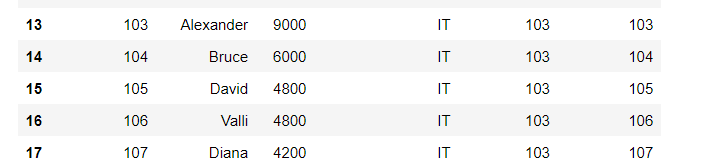

In [23]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    FIRST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC) AS max_earner,
    LAST_VALUE(employee_id) OVER (PARTITION BY department_name ORDER BY salary DESC
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS least_earner
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn).head(20)

,employee_id,first_name,salary,department_name,max_earner,least_earner
0,205,Shelley,12000,Accounting,205,205
1,206,William,8300,Accounting,205,206
2,200,Jennifer,4400,Administration,200,200
3,100,Steven,25000,Executive,100,100
4,101,Neena,17000,Executive,100,101
5,102,Lex,17000,Executive,100,102
6,108,Nancy,12000,Finance,108,108
7,109,Daniel,9000,Finance,108,109
8,110,John,8200,Finance,108,110
9,112,Jose Manuel,7800,Finance,108,112


#### alternate way of writing window fuction 

In [27]:
pd.read_sql_query('''

SELECT 
    employee_id,
    first_name,
    d.department_name,
    salary,
    FIRST_VALUE(employee_id) OVER w AS max_earner,
    salary,
    LAST_VALUE(employee_id) OVER w AS least_earner
FROM employees e
JOIN departments d
ON e.department_id = d.department_id
WINDOW w AS (PARTITION BY department_name ORDER BY salary DESC RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)



''', conn).head(20)

,employee_id,first_name,department_name,salary,max_earner,salary,least_earner
0,205,Shelley,Accounting,12000,205,12000,206
1,206,William,Accounting,8300,205,8300,206
2,200,Jennifer,Administration,4400,200,4400,200
3,100,Steven,Executive,25000,100,25000,102
4,101,Neena,Executive,17000,100,17000,102
5,102,Lex,Executive,17000,100,17000,102
6,108,Nancy,Finance,12000,108,12000,113
7,109,Daniel,Finance,9000,108,9000,113
8,110,John,Finance,8200,108,8200,113
9,112,Jose Manuel,Finance,7800,108,7800,113


#### NTH Value

- find the second most earning member in a department

In [30]:
pd.read_sql_query('''

SELECT 
    employee_id,
    salary,
    first_name,
    d.department_name,
    FIRST_VALUE(employee_id) OVER w AS max_earner,
    LAST_VALUE(employee_id) OVER w AS least_earner,
    NTH_VALUE(employee_id , 2) OVER w AS second_best_earner
FROM employees e
JOIN departments d
ON e.department_id = d.department_id
WINDOW w AS (PARTITION BY department_name ORDER BY salary DESC RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)



''', conn).head(20)

,employee_id,salary,first_name,department_name,max_earner,least_earner,second_best_earner
0,205,12000,Shelley,Accounting,205,206,206.0
1,206,8300,William,Accounting,205,206,206.0
2,200,4400,Jennifer,Administration,200,200,NaN
3,100,25000,Steven,Executive,100,102,101.0
4,101,17000,Neena,Executive,100,102,101.0
5,102,17000,Lex,Executive,100,102,101.0
6,108,12000,Nancy,Finance,108,113,109.0
7,109,9000,Daniel,Finance,108,113,109.0
8,110,8200,John,Finance,108,113,109.0
9,112,7800,Jose Manuel,Finance,108,113,109.0


- inside each partition it looks for the number specified inside nth value fuction
- for nth value as well the framing issue pops up , so use UB PREC and UN FOLL

#### NTILE 

segregate all the high income employees , mid range employees and low income employees

In [33]:
pd.read_sql_query('''

SELECT 
    employee_id,
    salary,
    first_name,
    d.department_name,
    FIRST_VALUE(employee_id) OVER w AS max_earner,
    LAST_VALUE(employee_id) OVER w AS least_earner,
    NTH_VALUE(employee_id , 2) OVER w AS second_best_earner,
    NTILE(4) OVER w as buckets
FROM employees e
JOIN departments d
ON e.department_id = d.department_id
WINDOW w AS (PARTITION BY department_name ORDER BY salary DESC RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)



''', conn).head(20)

,employee_id,salary,first_name,department_name,max_earner,least_earner,second_best_earner,buckets
0,205,12000,Shelley,Accounting,205,206,206.0,1
1,206,8300,William,Accounting,205,206,206.0,2
2,200,4400,Jennifer,Administration,200,200,NaN,1
3,100,25000,Steven,Executive,100,102,101.0,1
4,101,17000,Neena,Executive,100,102,101.0,2
5,102,17000,Lex,Executive,100,102,101.0,3
6,108,12000,Nancy,Finance,108,113,109.0,1
7,109,9000,Daniel,Finance,108,113,109.0,1
8,110,8200,John,Finance,108,113,109.0,2
9,112,7800,Jose Manuel,Finance,108,113,109.0,2


- this is done by partititoning and therefore there will be 2 buckets assighned to same salary
- in case we have 10 rows and 3 buckets to fill then it will be 1111 222 333 ie 1st bucket will be given more proprity 

In [50]:
pd.read_sql_query('''


SELECT 
    employee_id,
    first_name,
    x.department_name,
    CASE WHEN x.buckets = 1 THEN 'High Income Emp'
         WHEN x.buckets = 2 THEN 'Mid Income Emp'
         WHEN x.buckets = 3 THEN 'Low Income Emp'
    END AS Income_Buckets

FROM (

    SELECT 
        employee_id,
        salary,
        first_name,
        d.department_name,
        NTILE(3) OVER (ORDER BY salary) as buckets
    FROM employees e
    JOIN departments d
    ON e.department_id = d.department_id
    
    ) x


''', conn)

,employee_id,first_name,department_name,Income_Buckets
0,132,TJ,Shipping,High Income Emp
1,128,Steven,Shipping,High Income Emp
2,136,Hazel,Shipping,High Income Emp
3,127,James,Shipping,High Income Emp
4,135,Ki,Shipping,High Income Emp
...,...,...,...,...
101,146,Karen,Sales,Low Income Emp
102,145,John,Sales,Low Income Emp
103,101,Neena,Executive,Low Income Emp
104,102,Lex,Executive,Low Income Emp


#### CUME_DIST

fetch all the products which are constituting  the first 30% of data in products table based on price 

In [97]:
pd.read_sql_query('''



SELECT 
    employee_id,
    first_name,
    salary,
    d.department_name,
    
    CUME_DIST() OVER(PARTITION BY department_name ORDER BY salary DESC 
    RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS cume_distribution,
    
    ROUND(CUME_DIST() OVER(PARTITION BY department_name ORDER BY salary DESC 
    RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)*100,2) AS cume_distribution1
    
FROM employees e
JOIN departments d
ON e.department_id = d.department_id



''', conn).head(30)

,employee_id,first_name,salary,department_name,cume_distribution,cume_distribution1
0,205,Shelley,12000,Accounting,0.500000,50.00
1,206,William,8300,Accounting,1.000000,100.00
2,200,Jennifer,4400,Administration,1.000000,100.00
3,100,Steven,25000,Executive,0.333333,33.33
4,101,Neena,17000,Executive,1.000000,100.00
5,102,Lex,17000,Executive,1.000000,100.00
6,108,Nancy,12000,Finance,0.166667,16.67
7,109,Daniel,9000,Finance,0.333333,33.33
8,110,John,8200,Finance,0.500000,50.00
9,112,Jose Manuel,7800,Finance,0.666667,66.67
